<a href="https://colab.research.google.com/github/John-Z-byte/January-Sales-and-Conversion-Performance-Analysis/blob/main/anuary_Sales_and_Conversion_Performance_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

from google.colab import files

uploaded = files.upload()

Saving ATD_JAN.csv to ATD_JAN.csv
Saving SALES_JAN.csv to SALES_JAN.csv


In [58]:
# Import pandas
import pandas as pd

# Load the datasets with the correct encoding
leads_df = pd.read_csv('ATD_JAN.csv', encoding='ISO-8859-1')  # Try ISO-8859-1 or latin1 encoding
sales_df = pd.read_csv('SALES_JAN.csv', encoding='ISO-8859-1')  # Try ISO-8859-1 or latin1 encoding

# Show the first few rows of each dataset to check if they loaded correctly
leads_df.head(), sales_df.head()





(          TIME          PATIENT NAME                     MRN  \
 0  7 AM - 8 AM    Booker ,  Antson E  Ds1MPpjxQUmL9TSxRnMP-Q   
 1  7 AM - 8 AM   Collins ,  Ronald B  MaPa80MirUSokIQPus1ZVw   
 2  7 AM - 8 AM   Cantrell ,  Lydia I  XeTGvsH_n0al-7HUyswkkw   
 3  7 AM - 8 AM       Mullen ,  Kelly  O0_0sKyOSUOuYLZsCsS6Eg   
 4  7 AM - 8 AM  Chittenden ,  Robert  OQiUUTV1P02owxfMlcvjiA   
 
                            DOB      NUMBER      DATE  PATIENT RESPONSIBILITY   \
 0  Thursday, February 25, 1982  9319812836  1/2/2025                  $35.00    
 1     Tuesday, August 12, 1952  6783658643  1/2/2025                    $-      
 2   Tuesday, December 17, 1996  3074090048  1/2/2025                 $329.00    
 3   Tuesday, September 7, 1971  9312871193  1/2/2025                 $329.00    
 4   Tuesday, December 18, 1962  8037628163  1/2/2025                 $329.00    
 
      TIER    INSURANCE COMPANY                   TYPE                  REP  \
 0  TIER 1  Amerigroup Medicare  Ho

In [60]:
# Clean column names
df.columns = df.columns.str.strip()

# Remove rows with missing 'PATIENT RESPONSIBILITY'
df.dropna(subset=['PATIENT RESPONSIBILITY'], inplace=True)

# Remove dollar signs and commas, and convert 'PATIENT RESPONSIBILITY' to numeric
df['PATIENT RESPONSIBILITY'] = df['PATIENT RESPONSIBILITY'].replace({'\$': '', ',': ''}, regex=True).astype(float)

# Convert the 'DATE' column to datetime format
df['DATE'] = pd.to_datetime(df['DATE'], format='%m/%d/%Y')

# Handle incorrect STATUS values (e.g., typos, or invalid data entries)
df['STATUS'] = df['STATUS'].str.strip().str.upper()


                                DATE  PATIENT RESPONSIBILITY  Unnamed: 17
count                           2741             2741.000000          0.0
mean   2025-01-18 17:15:28.566216704              180.531937          NaN
min              2025-01-02 00:00:00                5.000000          NaN
25%              2025-01-10 00:00:00              104.650000          NaN
50%              2025-01-20 00:00:00              175.000000          NaN
75%              2025-01-27 00:00:00              329.000000          NaN
max              2025-02-05 00:00:00             3229.000000          NaN
std                              NaN              117.849500          NaN
DATE                         0
HOUR SOLD                    0
HOUR SOLD BY REP             1
HOUR LANDING                15
PATIENT NAME                 0
MRN                          0
DOB                          0
NUMBER                       0
DATE ADDED                  15
PATIENT RESPONSIBILITY       0
RANGE                   

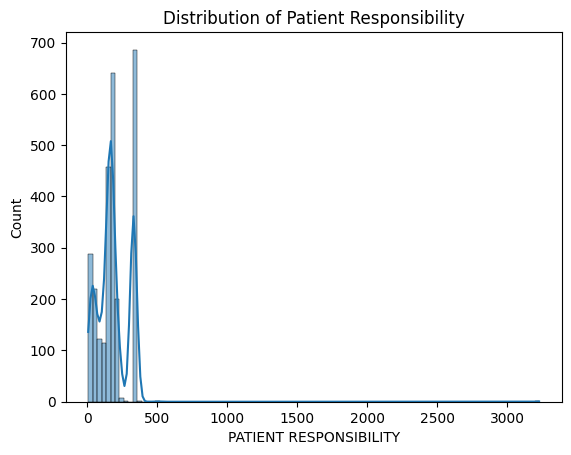

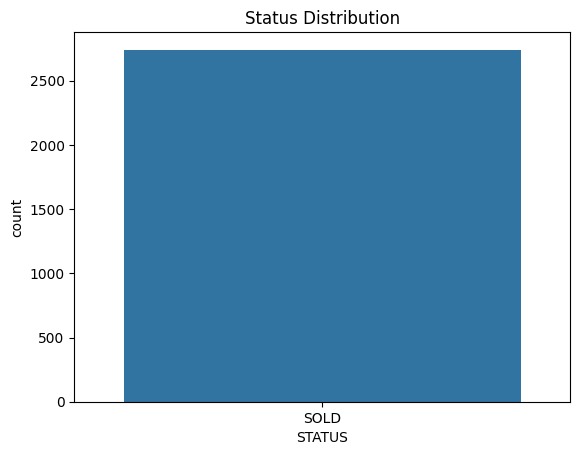

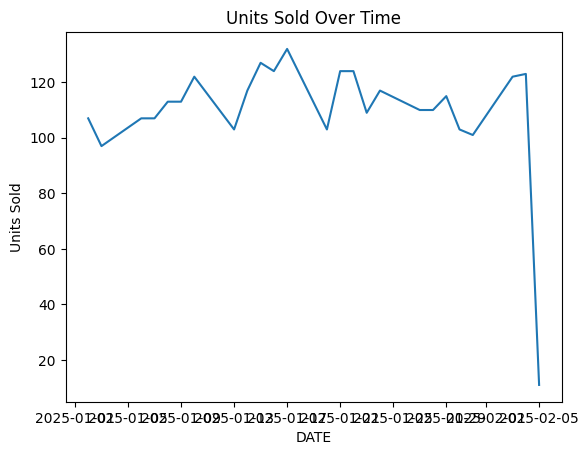

In [61]:
# Summary statistics for key columns
print(df.describe())

# Check for missing values
print(df.isnull().sum())

# Visualizing the distribution of patient responsibility
sns.histplot(df['PATIENT RESPONSIBILITY'], kde=True)
plt.title('Distribution of Patient Responsibility')
plt.show()

# Visualizing the count of each status
sns.countplot(x='STATUS', data=df)
plt.title('Status Distribution')
plt.show()

# Trend of sales (number of units sold) over time
df_grouped_date = df.groupby('DATE').size().reset_index(name='Units Sold')
sns.lineplot(x='DATE', y='Units Sold', data=df_grouped_date)
plt.title('Units Sold Over Time')
plt.show()


In [62]:
# General conversion rate
total_sales = df[df['STATUS'] == 'SOLD'].shape[0]
total_entries = df.shape[0]
conversion_rate = total_sales / total_entries * 100
print(f"General Conversion Rate: {conversion_rate:.2f}%")

# Conversion rate by rep
rep_conversion_rate = df.groupby('REP').apply(lambda x: (x['STATUS'] == 'SOLD').sum() / len(x) * 100).reset_index()
rep_conversion_rate.columns = ['REP', 'Conversion Rate']
rep_conversion_rate = rep_conversion_rate.sort_values(by='Conversion Rate', ascending=False)
print(rep_conversion_rate.head())

# Check for duplicate "SOLD" entries
duplicates = df[df['STATUS'] == 'SOLD'].groupby(['MRN', 'DATE']).size().reset_index(name='Count')
duplicates = duplicates[duplicates['Count'] > 1]
print(duplicates)


General Conversion Rate: 100.00%
                   REP  Conversion Rate
0         Albany Perez            100.0
1     Andres Rodriguez            100.0
2  Cristian Echavarria            100.0
3         Darwin Rojas            100.0
4         Darwin rojas            100.0
                         MRN       DATE  Count
543   BkaVWc8mPUO0vYRgKoqI8Q 2025-01-14      2
1894  g8oajFUmn0KFUeD1LheAiQ 2025-01-20      2


<ipython-input-62-9f88fe40ca3c>:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  rep_conversion_rate = df.groupby('REP').apply(lambda x: (x['STATUS'] == 'SOLD').sum() / len(x) * 100).reset_index()


In [63]:
# Calculate commission (assuming a 10% commission rate for example)
df['COMMISSION'] = df['PATIENT RESPONSIBILITY'] * 0.10

# Total commission per rep
commission_summary = df.groupby('REP')['COMMISSION'].sum().reset_index()
commission_summary = commission_summary.sort_values(by='COMMISSION', ascending=False)

print(commission_summary.head())


                  REP  COMMISSION
5       Hollman Ayala   10832.106
13  Vicente Jaramillo    6124.963
9     Manuela Bolívar    4265.937
1    Andres Rodriguez    3825.484
15     William Florez    3819.087


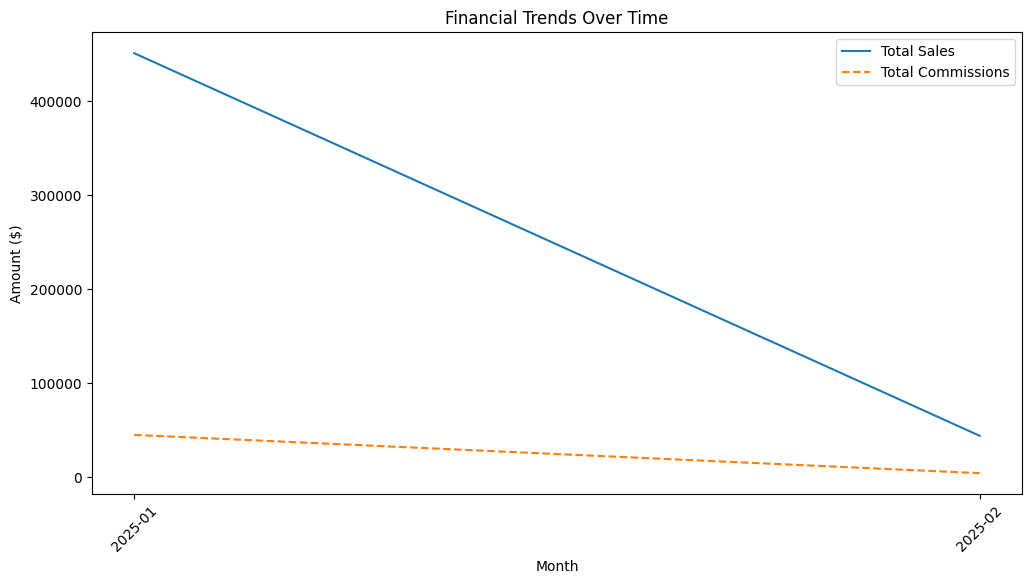

In [64]:
# Total sales and commissions per month
df['Month'] = df['DATE'].dt.to_period('M')
monthly_sales = df.groupby('Month')['PATIENT RESPONSIBILITY'].sum().reset_index()
monthly_commissions = df.groupby('Month')['COMMISSION'].sum().reset_index()

# Plot the financial trends over time
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales['Month'].astype(str), monthly_sales['PATIENT RESPONSIBILITY'], label='Total Sales')
plt.plot(monthly_commissions['Month'].astype(str), monthly_commissions['COMMISSION'], label='Total Commissions', linestyle='--')
plt.title('Financial Trends Over Time')
plt.xlabel('Month')
plt.ylabel('Amount ($)')
plt.legend()
plt.xticks(rotation=45)
plt.show()
